# Importing Libraries

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go

from datetime import datetime

# Styles and Settings

In [76]:
%matplotlib inline
sns.set(style='darkgrid')
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

# Imports from the previous notebook

In [77]:
country_list = ['Italy', 'Germany', 'France']

In [78]:
df_raw = pd.read_csv('../data/raw/owid-covid-data.csv')

In [79]:
df_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [80]:
df_raw.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [81]:
data_trivial = df_raw[['date', 'location','total_cases', 'population', 'people_fully_vaccinated', 'stringency_index']]

In [82]:
data_trivial = data_trivial.rename(columns={'location':'country', 'total_cases':'infected', 'people_fully_vaccinated':'vaccinated'})

In [83]:
data_trivial.head()

,date,country,infected,population,vaccinated,stringency_index
0,2020-02-24,Afghanistan,5.0,39835428.0,NaN,8.33
1,2020-02-25,Afghanistan,5.0,39835428.0,NaN,8.33
2,2020-02-26,Afghanistan,5.0,39835428.0,NaN,8.33
3,2020-02-27,Afghanistan,5.0,39835428.0,NaN,8.33
4,2020-02-28,Afghanistan,5.0,39835428.0,NaN,8.33


# Converting date to correct data-type

In [84]:
date_idx = [datetime.strptime(each, '%Y-%m-%d') for each in data_trivial.date]
data_trivial['date'] = date_idx

In [85]:
df_processed = pd.DataFrame(data_trivial['date'])

In [86]:
df_processed = pd.DataFrame(df_processed['date'].unique())

In [87]:
df_processed.rename(columns={0:'date'}, inplace=True)

In [88]:
df_processed.sort_values(by='date', inplace=True)

In [89]:
df_processed.set_index(['date'], inplace=True)

In [90]:
data_trivial.set_index(['date'], inplace=True)

In [91]:
for each in country_list:
    df_processed[each+'_infected'] = pd.DataFrame(data_trivial[data_trivial['country'] == each]['infected'])
    df_processed[each+'_population'] = pd.DataFrame(data_trivial[data_trivial['country'] == each]['population'])
    df_processed[each+'_stringency_index'] = pd.DataFrame(data_trivial[data_trivial['country'] == each]['stringency_index'])

In [92]:
df_processed.head()

,Italy_infected,Italy_population,Italy_stringency_index,Germany_infected,Germany_population,Germany_stringency_index,France_infected,France_population,France_stringency_index
date,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_population = df_processed.fillna(0)

In [94]:
country_population_list=np.zeros(len(country_list))
for pos, each in enumerate(country_list):
    country_population_list[pos] = max(df_population[each+'_population'])

In [95]:
#country_population_list

# Fitting the parameters of SIR model for each country

### Fitting the parameters of SIR model for Germany

In [96]:
from scipy import optimize
from scipy import integrate

In [97]:
ydata_Germany = np.array(df_processed.Germany_infected[60:])
ydata_Germany = ydata_Germany.astype(int)
t_Germany=np.arange(len(ydata_Germany))

In [98]:
# Parameters

#N0 = country_population_list[1] # Population size
N0 = 1000000
beta = 0.4
gamma = 0.1  # 1(gamma) Person can infect 4(beta) people

I0 = ydata_Germany[0]   # Initial infected size
#S0 = N0-I0  # Population prone to infection
S0 = N0-I0
R0 = 0  # Initial recovered size

In [99]:
I0

117

In [100]:
def SIR_model(SIR, t, beta, gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta:
        
        overall condition is that the sum of changes (differences) sum up to 0
        dS+dI+dR=0
        S+I+R = N (constant size of population)
    '''
    
    S,I,R = SIR
    dS_dt = -beta*S*I/N0
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    return ([dS_dt, dI_dt, dR_dt])

In [101]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model, (S0, I0, R0), t_Germany, args=(beta, gamma))[:,1] # we only would like to get dI

In [102]:
popt=[0.4, 0.1]
fit_odeint(t_Germany, *popt)

array([ 1.17000000e+02,  1.57924452e+02,  2.13158100e+02,  2.87699684e+02,
        3.88290525e+02,  5.24018997e+02,  7.07132193e+02,  9.54123799e+02,
        1.28718846e+03,  1.73615937e+03,  2.34107745e+03,  3.15557574e+03,
        4.25129737e+03,  5.72358968e+03,  7.69871064e+03,  1.03427094e+04,
        1.38719351e+04,  1.85646812e+04,  2.47726292e+04,  3.29293181e+04,
        4.35506614e+04,  5.72195925e+04,  7.45438971e+04,  9.60750182e+04,
        1.22179645e+05,  1.52869804e+05,  1.87623187e+05,  2.25256932e+05,
        2.63934499e+05,  3.01360038e+05,  3.35140610e+05,  3.63209191e+05,
        3.84162393e+05,  3.97408603e+05,  4.03114064e+05,  4.02012415e+05,
        3.95168700e+05,  3.83768497e+05,  3.68965890e+05,  3.51793712e+05,
        3.33123606e+05,  3.13659362e+05,  2.93949128e+05,  2.74406263e+05,
        2.55332512e+05,  2.36940027e+05,  2.19370745e+05,  2.02712584e+05,
        1.87012600e+05,  1.72287445e+05,  1.58531537e+05,  1.45723396e+05,
        1.33830490e+05,  

In [103]:
popt_Germany, pcov_Germany = optimize.curve_fit(fit_odeint, t_Germany, ydata_Germany)
perr_Germany = np.sqrt(np.diag(pcov_Germany))

C:\Users\tirth\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\tirth\AppData\Local\Temp/ipykernel_3160/2082430771.py:14: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\tirth\AppData\Local\Temp/ipykernel_3160/2082430771.py:15: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\tirth\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



In [104]:
print('standard deviation error: ', str(perr_Germany), 'start infect:', ydata_Germany[0])
print('Optimal parameters: beta = ', popt_Germany[0], 'and gamma = ', popt_Germany[1])

standard deviation error:  [8.60560826e-05 1.84955433e-05] start infect: 117
Optimal parameters: beta =  0.033745812054816374 and gamma =  -0.005420364370706291


In [105]:
fitted_Germany = fit_odeint(t_Germany, *popt_Germany)

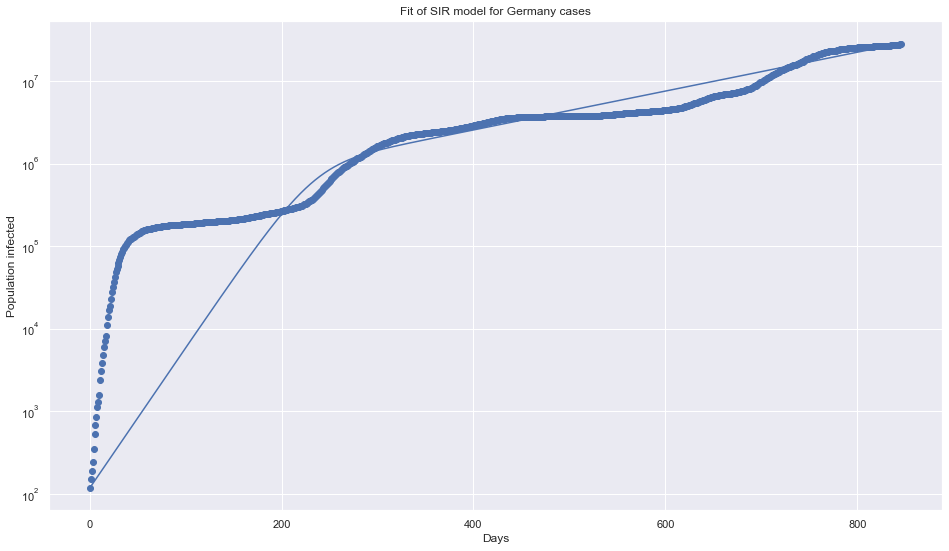

Optimal parameters: beta =  0.033745812054816374 and gamma =  -0.005420364370706291
Basic Reproduction Number R0:  -6.225746047109225


In [106]:
plt.semilogy(t_Germany, ydata_Germany, 'o',color='b')
plt.semilogy(t_Germany, fitted_Germany, color='b')
plt.title('Fit of SIR model for Germany cases')
plt.ylabel('Population infected')
plt.xlabel('Days')
plt.show()
print('Optimal parameters: beta = ', popt_Germany[0], 'and gamma = ', popt_Germany[1])
print('Basic Reproduction Number R0: ',popt_Germany[0]/popt_Germany[1] )

### Fitting the parameters of SIR model for Italy

In [107]:
ydata_Italy = np.array(df_processed.Italy_infected[70:])
#ydata_France = ydata_France.astype(int)
t_Italy=np.arange(len(ydata_Italy))

In [108]:
# Parameters

#N0 = country_population_list[1] # Population size
N0 = 10000000
beta = 0.4
gamma = 0.1  # 1(gamma) Person can infect 4(beta) people

I0 = ydata_Italy[0]   # Initial infected size
#S0 = N0-I0  # Population prone to infection
S0 = N0-I0
R0 = 0  # Initial recovered size

In [109]:
I0

12462.0

In [110]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model, (S0, I0, R0), t_Italy, args=(beta, gamma))[:,1] # we only would like to get dI

In [111]:
popt=[0.4, 0.1]
fit_odeint(t_Italy, *popt)

array([ 1.24620000e+04,  1.68117031e+04,  2.26734811e+04,  3.05679559e+04,
        4.11909127e+04,  5.54689058e+04,  7.46298049e+04,  1.00290036e+05,
        1.34558373e+05,  1.80151980e+05,  2.40512423e+05,  3.19895698e+05,
        4.23389003e+05,  5.56778089e+05,  7.26158127e+05,  9.37165073e+05,
        1.19373726e+06,  1.49644461e+06,  1.84067243e+06,  2.21526453e+06,
        2.60242364e+06,  2.97946488e+06,  3.32231546e+06,  3.60976204e+06,
        3.82698238e+06,  3.96724072e+06,  4.03152672e+06,  4.02673893e+06,
        3.96332571e+06,  3.85312541e+06,  3.70777935e+06,  3.53777564e+06,
        3.35200804e+06,  3.15768414e+06,  2.96043502e+06,  2.76451938e+06,
        2.57305554e+06,  2.38824436e+06,  2.21156614e+06,  2.04394613e+06,
        1.88588908e+06,  1.73758640e+06,  1.59900000e+06,  1.46992732e+06,
        1.35005115e+06,  1.23897750e+06,  1.13626427e+06,  1.04144256e+06,
        9.54032557e+05,  8.73555104e+05,  7.99539995e+05,  7.31531818e+05,
        6.69093889e+05,  

In [112]:
popt_Italy, pcov_Italy = optimize.curve_fit(fit_odeint, t_Italy, ydata_Italy)
perr_Italy = np.sqrt(np.diag(pcov_Italy))

In [113]:
print('standard deviation error: ', str(perr_Italy), 'start infect:', ydata_Italy[0])
print('Optimal parameters: beta = ', popt_Italy[0], 'and gamma = ', popt_Italy[1])

standard deviation error:  [1.24639160e-04 6.87885498e-05] start infect: 12462.0
Optimal parameters: beta =  0.008288991647762806 and gamma =  -0.0026589325439110114


In [114]:
fitted_Italy = fit_odeint(t_Italy, *popt_Italy)

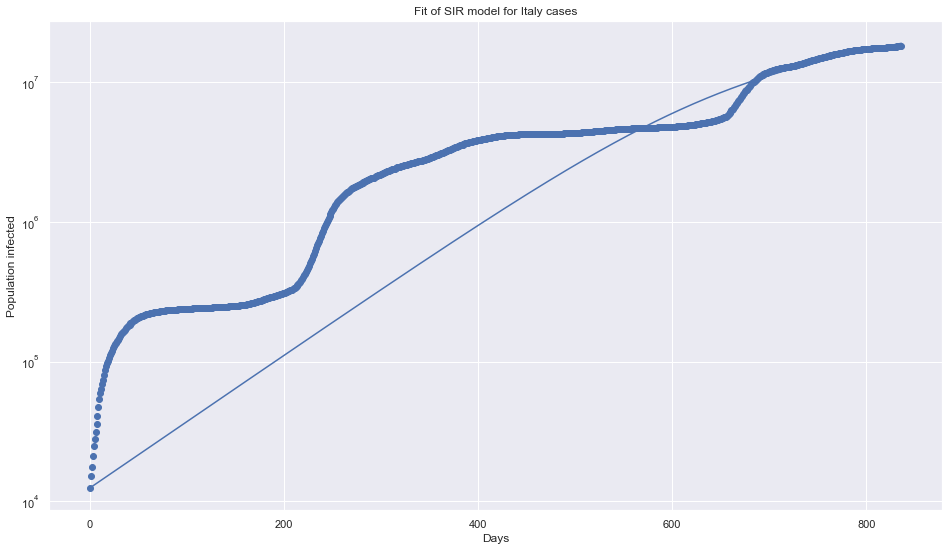

Optimal parameters: beta =  0.008288991647762806 and gamma =  -0.0026589325439110114
Basic Reproduction Number R0:  -3.1174132893084106


In [115]:
plt.semilogy(t_Italy, ydata_Italy, 'o',color='b')
plt.semilogy(t_Italy, fitted_Italy, color='b')
plt.title('Fit of SIR model for Italy cases')
plt.ylabel('Population infected')
plt.xlabel('Days')
plt.show()
print('Optimal parameters: beta = ', popt_Italy[0], 'and gamma = ', popt_Italy[1])
print('Basic Reproduction Number R0: ',popt_Italy[0]/popt_Italy[1] )

### Fitting the parameters of SIR model for France

In [116]:
ydata_France = np.array(df_processed.France_infected[70:])
t_France=np.arange(len(ydata_France))

In [117]:
# Parameters

#N0 = country_population_list[1] # Population size
N0 = 2000000
beta = 0.4
gamma = 0.1  # 1(gamma) Person can infect 4(beta) people

I0 = ydata_France[0]   # Initial infected size
#S0 = N0-I0  # Population prone to infection
S0 = N0-I0
R0 = 0  # Initial recovered size

In [118]:
I0

2293.0

In [119]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model, (S0, I0, R0), t_France, args=(beta, gamma))[:,1] # we only would like to get dI

In [120]:
popt=[0.4, 0.1]
fit_odeint(t_France, *popt)

array([ 2.29300000e+03,  3.09349319e+03,  4.17240234e+03,  5.62571220e+03,
        7.58180509e+03,  1.02118312e+04,  1.37429384e+04,  1.84747663e+04,
        2.47993180e+04,  3.32236397e+04,  4.43933976e+04,  5.91130637e+04,
        7.83546087e+04,  1.03241209e+05,  1.34986178e+05,  1.74762799e+05,
        2.23483682e+05,  2.81487605e+05,  3.48175021e+05,  4.21695738e+05,
        4.98843220e+05,  5.75296350e+05,  6.46234671e+05,  7.07174131e+05,
        7.54741632e+05,  7.87129523e+05,  8.04131635e+05,  8.06843539e+05,
        7.97203469e+05,  7.77538547e+05,  7.50212080e+05,  7.17398494e+05,
        6.80969599e+05,  6.42459992e+05,  6.03080232e+05,  5.63754039e+05,
        5.25164099e+05,  4.87797584e+05,  4.51987204e+05,  4.17946057e+05,
        3.85796220e+05,  3.55591620e+05,  3.27336022e+05,  3.00996999e+05,
        2.76516673e+05,  2.53819906e+05,  2.32820493e+05,  2.13425803e+05,
        1.95540230e+05,  1.79067725e+05,  1.63913621e+05,  1.49985923e+05,
        1.37196196e+05,  

In [121]:
popt_France, pcov_France = optimize.curve_fit(fit_odeint, t_France, ydata_France)
perr_France = np.sqrt(np.diag(pcov_France))

C:\Users\tirth\AppData\Local\Temp/ipykernel_3160/2082430771.py:14: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\tirth\AppData\Local\Temp/ipykernel_3160/2082430771.py:15: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\tirth\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



In [122]:
print('standard deviation error: ', str(perr_France), 'start infect:', ydata_France[0])
print('Optimal parameters: beta = ', popt_France[0], 'and gamma = ', popt_France[1])

standard deviation error:  [5.03805645e-04 5.12621212e-05] start infect: 2293.0
Optimal parameters: beta =  0.019306195762669717 and gamma =  -0.00504034799443953


In [123]:
fitted_France = fit_odeint(t_France, *popt_France)

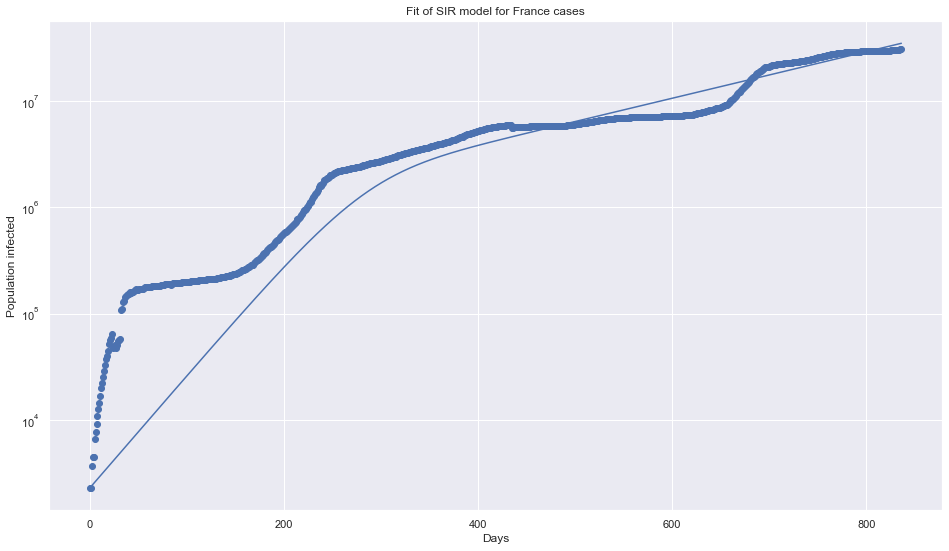

Optimal parameters: beta =  0.019306195762669717 and gamma =  -0.00504034799443953
Basic Reproduction Number R0:  -3.830329926419396


In [124]:
plt.semilogy(t_France, ydata_France, 'o',color='b')
plt.semilogy(t_France, fitted_France, color='b')
plt.title('Fit of SIR model for France cases')
plt.ylabel('Population infected')
plt.xlabel('Days')
plt.show()
print('Optimal parameters: beta = ', popt_France[0], 'and gamma = ', popt_France[1])
print('Basic Reproduction Number R0: ',popt_France[0]/popt_France[1] )

# Combined SIR-DataFrame

In [125]:
SIR=pd.DataFrame(t_Germany)

In [126]:
SIR.rename(columns={0:'date'}, inplace=True)

In [127]:
SIR['Germany_infected'], SIR['Germany_infected_fitted'] =pd.DataFrame(ydata_Germany), pd.DataFrame(fitted_Germany)

In [128]:
SIR.head()

,date,Germany_infected,Germany_infected_fitted
0,0,117,117.000000
1,1,150,121.672876
2,2,188,126.532364
3,3,240,131.585917
4,4,349,136.841281


In [129]:
SIR['Italy_infected'], SIR['Italy_infected_fitted'] =pd.DataFrame(ydata_Italy), pd.DataFrame(fitted_Italy)


In [130]:
SIR.tail()

,date,Germany_infected,Germany_infected_fitted,Italy_infected,Italy_infected_fitted
842,842,27454225,2.806961e+07,NaN,NaN
843,843,27573585,2.822217e+07,NaN,NaN
844,844,27681775,2.837556e+07,NaN,NaN
845,845,27771111,2.852979e+07,NaN,NaN
846,846,27771112,2.868485e+07,NaN,NaN


In [131]:
SIR['France_infected'], SIR['France_infected_fitted'] =pd.DataFrame(ydata_France), pd.DataFrame(fitted_France)

In [132]:
SIR.head()

,date,Germany_infected,Germany_infected_fitted,Italy_infected,Italy_infected_fitted,France_infected,France_infected_fitted
0,0,117,117.000000,12462.0,12462.000000,2293.0,2293.000000
1,1,150,121.672876,15113.0,12599.051907,2293.0,2349.459256
2,2,188,126.532364,17660.0,12737.609953,3678.0,2407.307624
3,3,240,131.585917,21157.0,12877.690665,4493.0,2466.579229
4,4,349,136.841281,24747.0,13019.310752,4529.0,2527.309033


# Dashboard creation

In [133]:
# country drop-down list
option_list = []
for each in country_list:
    option = {'label':each, 'value':each+'_infected'}
    option_list.append(option)

In [134]:
option_list

[{'label': 'Italy', 'value': 'Italy_infected'},
 {'label': 'Germany', 'value': 'Germany_infected'},
 {'label': 'France', 'value': 'France_infected'}]

In [135]:
import dash
import dash_core_components as dcc
import dash_html_components as html

fig = go.Figure()
app = dash.Dash()

app.layout = html.Div([
    html.Label(children='STATISTICS OF COVID-19'),
    dcc.Dropdown(id='country_drop_down', options=option_list, multi=False, value=option_list[0]['value'], placeholder='Filter by COUNTRY...'),
    dcc.Graph(figure=fig, id='main_window_slope') # Output
])

In [136]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_function(country_drop_down):
    
    traces = []
    
    #if country_drop_down == 'Germany_infected':
    traces.append(dict(x=SIR.index,
                       y=SIR[country_drop_down],
                         mode='markers',
                         opacity=0.9,
                         line_width=2,
                         marker_size=4,
                         name=country_drop_down))
    traces.append(dict(x=SIR.index,
                       y=SIR[country_drop_down+str('_fitted')],
                         mode='lines',
                         opacity=0.9,
                         line_width=2,
                         marker_size=4,
                         name=country_drop_down+str('_fitted')))
    # Object rendering will be returned to layout
    
    
   

    
    return {
            'data': traces,
            'layout': dict(
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Infected_population",
                xaxis={'title':'Timeline',
                       'tickangle':-45,
                       'nticks':20,
                       'tickfont':dict(size=14, color="#7f7f7f"),
                      },
                yaxis={'title':'infected Population',
                       'type':"linear",
                       'range':'[1.1,5.5]'}
            )}

In [137]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# SIR Model

In [138]:
data_raw = pd.read_csv('../data/raw/owid-covid-data.csv')

In [139]:
country_list = data_raw['location'].unique()

In [140]:
data_analysis = pd.read_csv('../data/processed/Final_processed_data.csv')
data_analysis.set_index(['date'], inplace=True)
data_analysis.head()

,Afghanistan_Infected_population,Afghanistan_Relativecases,Afghanistan_Vaccination_Rate,Africa_Infected_population,Africa_Relativecases,Africa_Vaccination_Rate,Albania_Infected_population,Albania_Relativecases,Albania_Vaccination_Rate,Algeria_Infected_population,...,World_Vaccination_Rate,Yemen_Infected_population,Yemen_Relativecases,Yemen_Vaccination_Rate,Zambia_Infected_population,Zambia_Relativecases,Zambia_Vaccination_Rate,Zimbabwe_Infected_population,Zimbabwe_Relativecases,Zimbabwe_Vaccination_Rate
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
data_infected= pd.DataFrame(data_analysis.index)
data_infected.set_index(['date'], inplace=True)

In [142]:
for each in country_list:
    data_infected[each] = pd.DataFrame(data_analysis[each+str('_Infected_population')])

C:\Users\tirth\AppData\Local\Temp/ipykernel_3160/493589281.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [143]:
data_infected.tail()

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-06-21,181808.0,11994315.0,277663.0,265993.0,43449.0,99761.0,3411.0,8581.0,9341492.0,423104.0,...,10989.0,29.0,525105.0,10738909.0,454.0,NaN,540568475.0,11824.0,324558.0,254919.0
2022-06-22,181912.0,12002174.0,277940.0,266006.0,43774.0,99761.0,3411.0,8590.0,9341492.0,423104.0,...,11026.0,29.0,525105.0,10739855.0,454.0,NaN,541372563.0,11824.0,324558.0,255049.0
2022-06-23,181987.0,12011490.0,278211.0,266015.0,43774.0,99761.0,3411.0,8590.0,9341492.0,423104.0,...,11033.0,29.0,525340.0,10740595.0,454.0,NaN,542126850.0,11824.0,324922.0,255136.0
2022-06-24,182033.0,12017973.0,278504.0,266025.0,43774.0,99761.0,3411.0,8625.0,9341492.0,423104.0,...,11044.0,29.0,525539.0,10742234.0,454.0,NaN,542917852.0,11824.0,325110.0,255309.0
2022-06-25,182072.0,12023592.0,278793.0,266030.0,43774.0,99761.0,3411.0,8625.0,9341492.0,423104.0,...,11044.0,29.0,525716.0,10742891.0,454.0,NaN,543323503.0,11824.0,325110.0,255309.0


In [144]:
# Parameters

N0 = 80000000 # Population size
beta = 0.4
gamma = 0.1  # 1(gamma) Person can infect 4(beta) people

I0 = data_infected.Germany[35]   # Initial infected size
S0 = N0-I0  # Population prone to infection
R0 = 0  # Initial recovered size

In [145]:
def SIR_model(SIR, beta, gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta:
        
        overall condition is that the sum of changes (differences) sum up to 0
        dS+dI+dR=0
        S+I+R = N (constant size of population)
    '''
    
    S,I,R = SIR
    dS_dt = -beta*S*I/N0
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    return ([dS_dt, dI_dt, dR_dt])

In [146]:
SIR = np.array([S0,I0,R0])
propagation_rates = pd.DataFrame(columns={'susceptible':S0, 'infected':I0, 'recovered':R0})

for each_t in np.arange(200):
#for each_t in np.arange(len(data_infected)):
    new_delta_vec = SIR_model(SIR, beta, gamma)
    SIR = SIR+new_delta_vec
    propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
    

In [147]:
propagation_rates.tail()

,susceptible,infected,recovered
195,1.231996e+06,29.763631,7.876797e+07
196,1.231995e+06,26.970611,7.876798e+07
197,1.231995e+06,24.439688,7.876798e+07
198,1.231995e+06,22.146267,7.876798e+07
199,1.231995e+06,20.068061,7.876798e+07


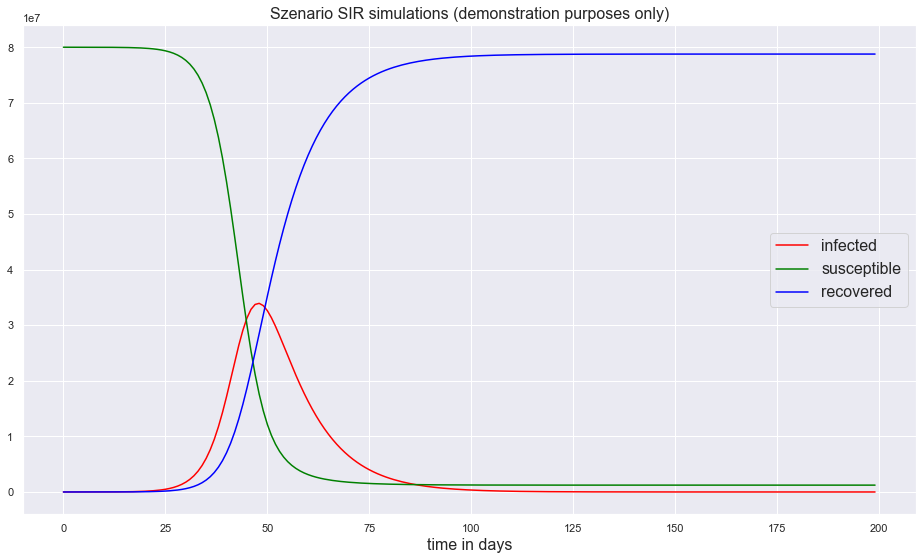

In [148]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index, propagation_rates.infected, label = 'infected', color = 'red')
ax1.plot(propagation_rates.index, propagation_rates.susceptible, label = 'susceptible', color = 'green')
ax1.plot(propagation_rates.index, propagation_rates.recovered, label = 'recovered', color = 'blue')


ax1.set_yscale('linear')

ax1.set_title('Szenario SIR simulations (demonstration purposes only)', size = 16)
ax1.set_xlabel('time in days', size = 16)
ax1.legend(loc = 'best', prop={'size':16})